In [3]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns

loja_1 = pd.read_csv('dados\loja_1.csv')
loja_2 = pd.read_csv('dados\loja_2.csv')
loja_3 = pd.read_csv('dados\loja_3.csv')
loja_4 = pd.read_csv('dados\loja_4.csv')


# Criação de uma nova coluna para diferencias as loja e após isso concatenei os datasets para facilitar o manuseio
loja_1['Loja'] = 'Loja1'
loja_2['Loja'] = 'Loja2'
loja_3['Loja'] = 'Loja3'
loja_4['Loja'] = 'Loja4'

concat_lojas = pd.concat([loja_1, loja_2, loja_3, loja_4], ignore_index=True)


# Tratamento da coluna Frete para duas casas decimais
concat_lojas['Frete'] = concat_lojas['Frete'].round(2)


# Alterando o tipo da coluna Data da Compra de object para datetime
concat_lojas['Data da Compra'] = pd.to_datetime(concat_lojas['Data da Compra'])

concat_lojas

C:\Users\Matheus\AppData\Local\Temp\ipykernel_4888\2381073326.py:23: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  concat_lojas['Data da Compra'] = pd.to_datetime(concat_lojas['Data da Compra'])


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.25,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja1
1,Mesa de jantar,moveis,256.35,11.23,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja1
2,Jogo de tabuleiro,brinquedos,279.51,21.26,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja1
3,Micro-ondas,eletrodomesticos,1009.99,54.67,2022-03-05,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja1
4,Cadeira de escritório,moveis,446.99,26.96,2020-07-11,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de jantar,moveis,303.60,16.85,2020-12-02,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,Loja4
9431,Cadeira de escritório,moveis,456.02,24.81,2022-05-17,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,Loja4
9432,Copo térmico,esporte e lazer,48.99,3.14,2022-03-05,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,Loja4
9433,Jogo de panelas,utilidades domesticas,202.45,11.06,2020-06-15,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55,Loja4


FATURAMENTO TOTAL DE CADA LOJA

    Loja       Preço
0  Loja1  1534509.12
1  Loja2  1488459.06
2  Loja3  1464025.03
3  Loja4  1384497.58


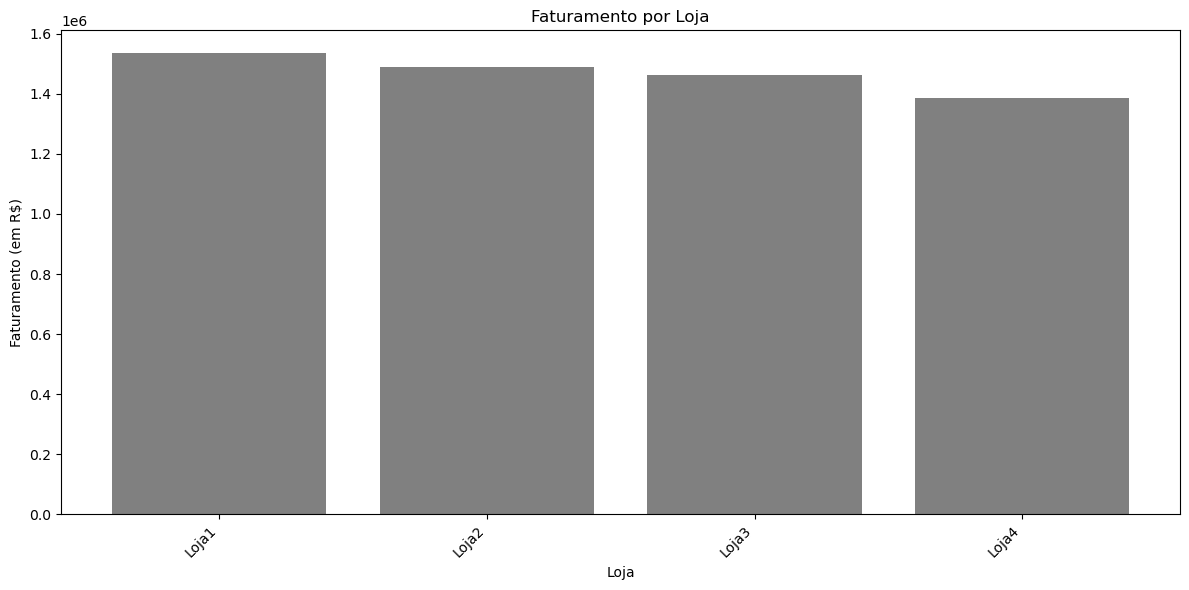

In [24]:
faturamento_por_loja = concat_lojas.groupby('Loja')['Preço'].sum().reset_index()

# Ordenar do maior para o menor faturamento
faturamento_por_loja = faturamento_por_loja.sort_values(by='Preço', ascending=False)

print(faturamento_por_loja)

# Agrupar o faturamento por loja
faturamento_por_loja = concat_lojas.groupby('Loja')['Preço'].sum().reset_index()

# Ordenar do maior para o menor faturamento
faturamento_por_loja = faturamento_por_loja.sort_values(by='Preço', ascending=False)

# Gráfico de barras do faturamento por loja
plt.figure(figsize=(12, 6))
plt.bar(faturamento_por_loja['Loja'], faturamento_por_loja['Preço'], color='gray')

# Títulos e rótulos
plt.title('Faturamento por Loja')
plt.ylabel('Faturamento (em R$)')
plt.xlabel('Loja')

# Rotacionar os nomes das lojas para melhorar a legibilidade
plt.xticks(rotation=45, ha='right')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


QUANTIDADE DE PRODUTOS VENDIDOS POR CATEGORIA EM CADA LOJA

In [6]:
vendas_por_categoria_loja = concat_lojas.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade de Vendas')

# Ordenar para ver as mais populares primeiro
vendas_por_categoria_loja = vendas_por_categoria_loja.sort_values(by=['Loja', 'Quantidade de Vendas'], ascending=[True, False])

print(vendas_por_categoria_loja)

     Loja   Categoria do Produto  Quantidade de Vendas
6   Loja1                 moveis                   465
2   Loja1            eletronicos                   448
0   Loja1             brinquedos                   324
1   Loja1       eletrodomesticos                   312
3   Loja1        esporte e lazer                   284
4   Loja1  instrumentos musicais                   182
5   Loja1                 livros                   173
7   Loja1  utilidades domesticas                   171
14  Loja2                 moveis                   442
10  Loja2            eletronicos                   422
8   Loja2             brinquedos                   313
9   Loja2       eletrodomesticos                   305
11  Loja2        esporte e lazer                   275
12  Loja2  instrumentos musicais                   224
13  Loja2                 livros                   197
15  Loja2  utilidades domesticas                   181
22  Loja3                 moveis                   499
18  Loja3 

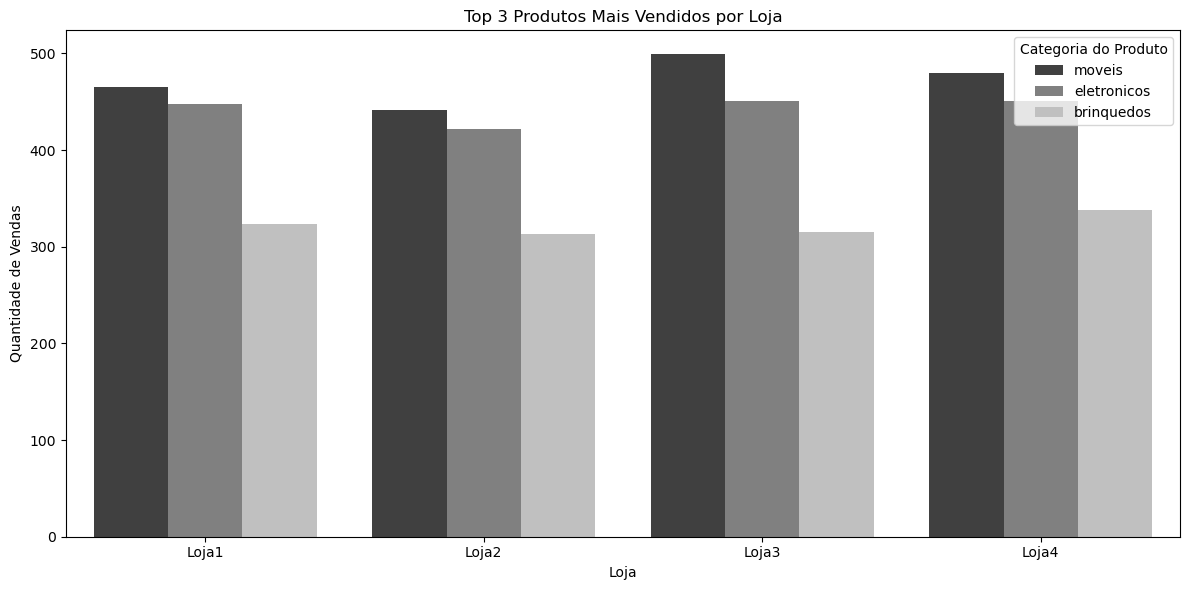

In [7]:
# Agrupando pela loja e produto, e contando as vendas
vendas_por_produto_loja = concat_lojas.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade de Vendas')

# Ordenando para ver os mais vendidos primeiro
vendas_por_produto_loja = vendas_por_produto_loja.sort_values(by=['Loja', 'Quantidade de Vendas'], ascending=[True, False])

# Pegando os 3 produtos mais vendidos por loja
top_3_produtos_por_loja = vendas_por_produto_loja.groupby('Loja').head(3).reset_index(drop=True)

# Gráfico de barras dos 3 produtos mais vendidos por loja
plt.figure(figsize=(12, 6))

# Usando uma paleta de tons de cinza
sns.barplot(data=top_3_produtos_por_loja, x='Loja', y='Quantidade de Vendas', hue='Categoria do Produto', palette='gray')

# Títulos e rótulos
plt.title('Top 3 Produtos Mais Vendidos por Loja')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Loja')

# Ajuste da legenda
plt.legend(title='Categoria do Produto')

# Ajuste de layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


MÉDIA DAS AVALIAÇÕES DOS CLIENTES EM CADA LOJA

    Loja  Média das Avaliações
0  Loja1              3.976685
1  Loja2              4.037304
2  Loja3              4.048326
3  Loja4              3.995759


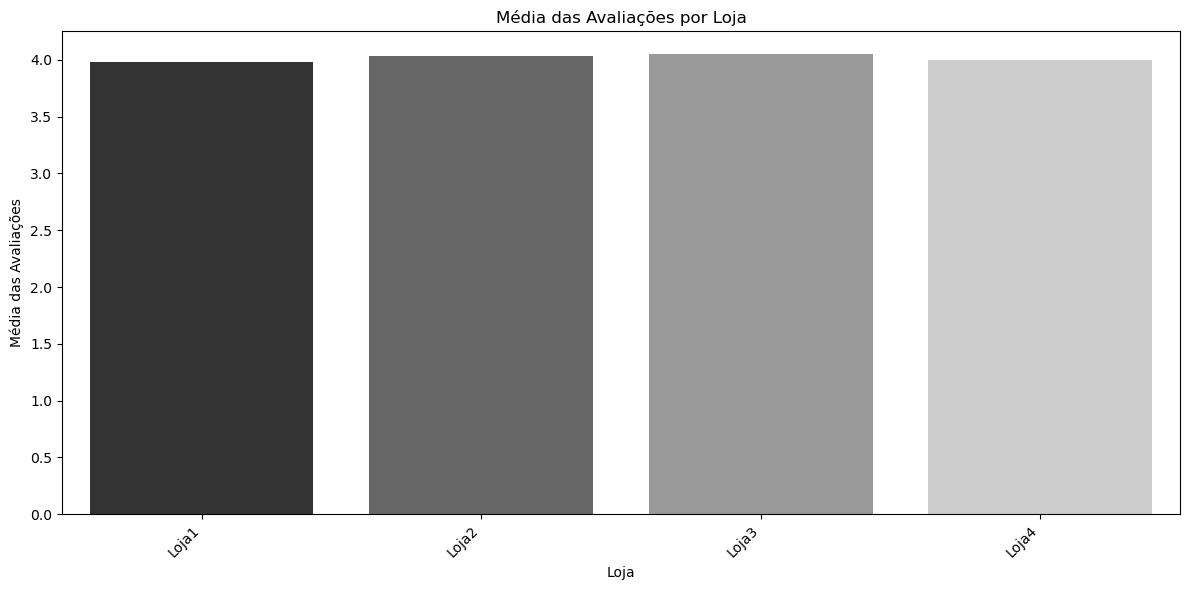

In [25]:
media_avaliacoes = concat_lojas.groupby('Loja')['Avaliação da compra'].mean().reset_index()

# Renomeia a coluna para ficar mais claro
media_avaliacoes.columns = ['Loja', 'Média das Avaliações']

print(media_avaliacoes)

# Agrupar pela loja e calcular a média das avaliações
media_avaliacoes = concat_lojas.groupby('Loja')['Avaliação da compra'].mean().reset_index()

# Renomeando a coluna para uma melhor compreensão
media_avaliacoes.columns = ['Loja', 'Média das Avaliações']

# Gráfico de barras da média das avaliações por loja
plt.figure(figsize=(12, 6))

# Usando uma paleta de tons de cinza
sns.barplot(data=media_avaliacoes, x='Loja', y='Média das Avaliações', palette='gray')

# Títulos e rótulos
plt.title('Média das Avaliações por Loja')
plt.ylabel('Média das Avaliações')
plt.xlabel('Loja')

# Ajuste do layout
plt.xticks(rotation=45, ha='right')  # Rotacionar os nomes das lojas para melhor visualização
plt.tight_layout()

# Exibir o gráfico
plt.show()

MÉDIA DAS AVALIAÇÕES DOS CLIENTES POR CATEGORIA EM CADA LOJA

In [26]:
# Média de avaliações por categoria em cada loja
media_avaliacoes_categoria = concat_lojas.groupby(['Loja', 'Categoria do Produto'])['Avaliação da compra'] \
                                         .mean() \
                                         .round(2) \
                                         .reset_index()

# Renomeia a coluna para melhor leitura
media_avaliacoes_categoria.columns = ['Loja', 'Categoria do Produto', 'Média da Avaliação']

# Ordena por loja e média (opcional)
media_avaliacoes_categoria = media_avaliacoes_categoria.sort_values(by=['Loja', 'Média da Avaliação'], ascending=[True, False])

# Exibe o resultado
print(media_avaliacoes_categoria)


     Loja   Categoria do Produto  Média da Avaliação
0   Loja1             brinquedos                4.08
4   Loja1  instrumentos musicais                4.05
1   Loja1       eletrodomesticos                4.03
2   Loja1            eletronicos                4.00
5   Loja1                 livros                3.98
6   Loja1                 moveis                3.95
3   Loja1        esporte e lazer                3.90
7   Loja1  utilidades domesticas                3.75
14  Loja2                 moveis                4.09
9   Loja2       eletrodomesticos                4.07
11  Loja2        esporte e lazer                4.07
15  Loja2  utilidades domesticas                4.07
12  Loja2  instrumentos musicais                4.04
8   Loja2             brinquedos                4.03
10  Loja2            eletronicos                3.97
13  Loja2                 livros                3.95
16  Loja3             brinquedos                4.20
22  Loja3                 moveis              

PRODUTOS COM MAIS E MENOS VENDAS POR LOJA

In [11]:
# Conta quantas vezes cada produto foi vendido por loja
vendas_por_produto = concat_lojas.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade de Vendas')

# Ordena para facilitar a visualização posterior
vendas_por_produto = vendas_por_produto.sort_values(by=['Loja', 'Quantidade de Vendas'], ascending=[True, False])

# Produto mais vendido por loja
mais_vendidos = vendas_por_produto.loc[vendas_por_produto.groupby('Loja')['Quantidade de Vendas'].idxmax()]

# Produto menos vendido por loja
menos_vendidos = vendas_por_produto.loc[vendas_por_produto.groupby('Loja')['Quantidade de Vendas'].idxmin()]


print("Produtos mais vendidos por loja:")
print(mais_vendidos)

print("Produtos menos vendidos por loja:")
print(menos_vendidos)


Produtos mais vendidos por loja:
      Loja                   Produto  Quantidade de Vendas
24   Loja1             Guarda roupas                    60
79   Loja2  Iniciando em programação                    65
134  Loja3             Kit banquetas                    57
161  Loja4                  Cama box                    62
Produtos menos vendidos por loja:
      Loja            Produto  Quantidade de Vendas
11   Loja1       Celular ABXY                    33
82   Loja2  Jogo de tabuleiro                    32
105  Loja3   Blocos de montar                    35
178  Loja4           Guitarra                    33


FRETE MÉDIO POR LOJA

    Loja  Frete Médio
0  Loja1    34.691763
1  Loja2    33.621971
2  Loja3    33.074392
3  Loja4    31.279042


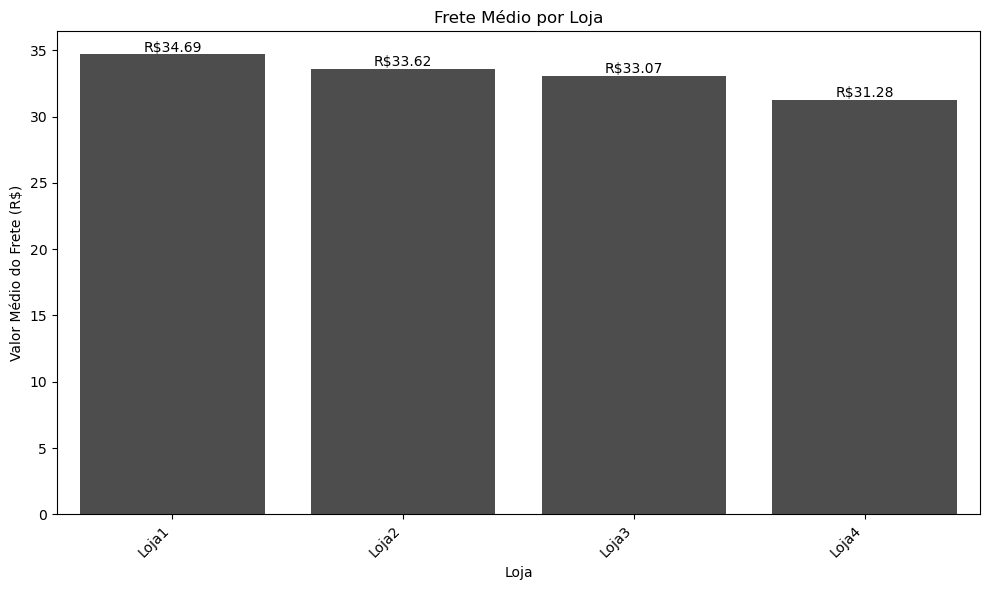

In [27]:
# Calcula a média do frete por loja
frete_medio_por_loja = concat_lojas.groupby('Loja')['Frete'].mean().reset_index()

# Renomeando as colunas
frete_medio_por_loja.columns = ['Loja', 'Frete Médio']

print(frete_medio_por_loja)


# Gráfico de barras com o frete médio por loja
plt.figure(figsize=(10, 6))
sns.barplot(data=frete_medio_por_loja, x='Loja', y='Frete Médio', color='#4d4d4d')  # tom de cinza escuro

# Títulos e rótulos
plt.title('Frete Médio por Loja')
plt.ylabel('Valor Médio do Frete (R$)')
plt.xlabel('Loja')

# Exibindo os valores em cima das barras
for index, row in frete_medio_por_loja.iterrows():
    plt.text(index, row['Frete Médio'] + 0.2, f"R${row['Frete Médio']:.2f}", ha='center')

# Ajustes finais
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

MAPA DE CALOR INTERARIVO MOSTRANDO ONDE HÁ MAIOR CONCENTRAÇÃO DE VENDAS

In [30]:
df_geo = concat_lojas.dropna(subset=["lat", "lon"])

# Criar coluna com valor total da compra
df_geo["Valor Total"] = df_geo["Preço"] + df_geo["Frete"]

# Heatmap das Vendas
heatmap = folium.Map(location=map_center, zoom_start=5)

# Adiciona o heatmap com base nas coordenadas
heat_data = [[row["lat"], row["lon"]] for index, row in df_geo.iterrows()]
HeatMap(heat_data).add_to(heatmap)

heatmap
